[*********************100%***********************]  1 of 1 completed


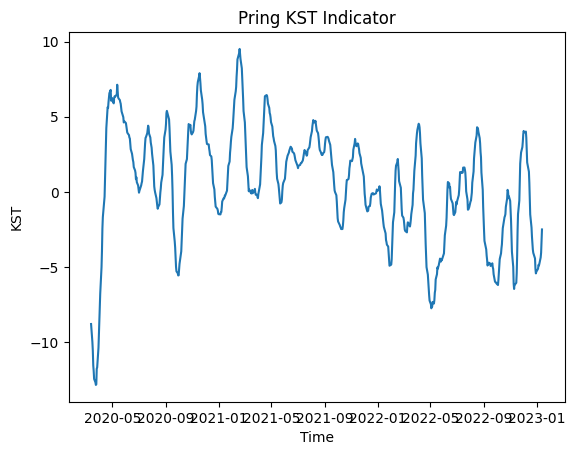

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance

#read the data
stock = "GOOGL"
data = yfinance.download(stock, '2020-01-01', '2023-1-13')

# Define the periods for the ROC calculations
periods = [10, 15, 20, 30, 40]

# Calculate the ROC for each period
roc_values = [data['Close'].pct_change(period) for period in periods]

# Calculate the weighted moving average for each ROC
kst_values = [roc_values[0].rolling(10).mean()]
for i in range(1, len(periods)):
    kst_values.append(roc_values[i].rolling(10).mean() + kst_values[i-1] * i)

# Calculate the KST indicator
data['KST'] = kst_values[-1]

# Plot the KST indicator
plt.plot(data.index, data['KST'])
plt.xlabel('Time')
plt.ylabel('KST')
plt.title('Pring KST Indicator')
plt.show()